In [1]:
import os
import sys
from os import path
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer
from fancyimpute import KNN 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
from numpy import genfromtxt
import missingno as msno
%matplotlib inline
import seaborn
from plotnine import *
from plotnine import ggplot, aes, geom_line

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
def is_fileExists(filename):
    if path.isfile(filename):
        return True
    else:
        return False

In [3]:
def read_csv(filename):
    try:
        if (is_fileExists):
            fileHandler=pd.read_csv(filename)
            return fileHandler
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [4]:
def get_columnNames(filePd):
    try:
        return (filePd.columns.tolist())
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [5]:
def found_missing_series(fileHandler):
    try:
        dic_out = {}
        fileHandler.isna().sum()
        result=fileHandler.isna().sum()
        resultToDict=result.to_dict()
        for x, y in resultToDict.items():
            if y != 0:
                dic_out[x] = y
        result_series = pd.Series(dic_out) 
        return result_series
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [6]:
def impute_data_mice(filePd,column_names):
    try:
        mice_imputer = IterativeImputer()
        arr = mice_imputer.fit_transform(filePd) 
        filePd = pd.DataFrame(arr, columns =column_names)
        return filePd
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [7]:
#Encoder - Ordinal
from sklearn.preprocessing import OrdinalEncoder
def ordinalEncoder(filePd,column_names):
    try:
        d1 = filePd.copy()
        encoder = OrdinalEncoder()
        d1 = encoder.fit_transform(d1)
        return d1
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))
# Label
from sklearn import preprocessing
def labelEncoder(filePd,column_names):
    try:
        d1 = filePd.copy()
        for i in column_names:
            le = preprocessing.LabelEncoder()
        d1[i] = le.fit_transform(d1[i])
        return d1
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [8]:
#Scaler
#Max-Min
from sklearn.preprocessing import MinMaxScaler
def minMaxScaler(filePd):
    try:
        scaler = MinMaxScaler()
        scaledData = scaler.fit_transform(filePd)
        scaledData = pd.DataFrame(scaledData, columns=filePd.columns)
        return scaledData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))
#Robust
from sklearn.preprocessing import RobustScaler
def robustScaler(filePd):
    try:
        scaler = RobustScaler()
        scaledData = scaler.fit_transform(filePd)
        scaledData = pd.DataFrame(scaledData, columns=filePd.columns)
        return scaledData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))
#Standard Scaler
from sklearn.preprocessing import StandardScaler
def standardScaler(filePd):
    try:
        scaler = StandardScaler()
        scaledData = scaler.fit_transform(filePd)
        scaledData = pd.DataFrame(scaledData, columns=filePd.columns)
        return scaledData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [9]:

#Outlier
def visualizeOutlier(col_name1,title1):
    try:
        # dataNumeric = data.drop(nonNumeric, axis=1)
        sns.boxplot(col_name1).set_title(title1)
        plt.show()
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))
#Detect - Zscore
def zScoreOutlier(filePd):
    try:
        # dataNumeric = data.drop(nonNumeric, axis=1)
        zScore = np.abs(stats.zscore(filePd))
        print(np.where(zScore > 3))
        outlierData = data[(zScore < 3).all(axis=1)]

        return outlierData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))
#Detect - IQR outlier
def IQROutlier(filePd):
    try:
        # dataNumeric = data.drop(nonNumeric, axis=1)
        quantile1 = data.quantile(0.25)
        quantile3 = data.quantile(0.75)
        IQR = quantile3 - quantile1
        print(IQR)
        outlierData = filePd[~((filePd < (quantile1 - 1.5 * IQR)) | (data > (quantile3 + 1.5 * IQR))).any(axis=1)]
        outlierData.shape
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))


In [10]:
#PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
def findPCA(data):

  #preprocessing_data
  scaler = StandardScaler() 
  X_scaled = scaler.fit_transform(data) 
    
  # Normalizing the data so that  
  # the data approximately follows a Gaussian distribution 
  X_normalized = normalize(X_scaled) 
    
  # Converting the numpy array into a pandas DataFrame 
  X_normalized = pd.DataFrame(X_normalized)

  pca = PCA(n_components = 13) 
  X_principal = pca.fit_transform(X_normalized) 
  X_principal = pd.DataFrame(X_principal) 
  X_principal.columns = ['male','age','cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']
  #return X_principal
  #print(X_principal.head())
  
  #Building the clustering model
  db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) 
  labels = db_default.labels_ 
  #Visualizing the clustering
  # Building the label to colour mapping 
  colours = {} 
  colours[0] = 'r'
  colours[1] = 'g'
  colours[2] = 'b'
  colours[-1] = 'k'
      
    # Building the colour vector for each data point 
  cvec = [colours[label] for label in labels] 
      
    # For the construction of the legend of the plot 
  r = plt.scatter(X_principal['age'], X_principal['heartRate'], color ='r'); 
  g = plt.scatter(X_principal['age'], X_principal['heartRate'], color ='g'); 
  b = plt.scatter(X_principal['age'], X_principal['heartRate'], color ='b'); 
  k = plt.scatter(X_principal['age'], X_principal['heartRate'], color ='k'); 
      
    # Plotting P1 on the X-Axis and P2 on the Y-Axis  
    # according to the colour vector defined 
  plt.figure(figsize =(9, 9)) 
  plt.scatter(X_principal['age'], X_principal['heartRate'], c = cvec) 
      
  # Building the legend 
  plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))     
  plt.show()

In [11]:
#Detect - DBScan

from sklearn.neighbors import NearestNeighbors

def findDBScanEPS(data, n_neighbors):
      nn = NearestNeighbors(n_neighbors=2)
      nbrs = nn.fit(data)
      distances, indices = nbrs.kneighbors(data)

      distances = np.sort(distances, axis=0)
      distances = distances[:, 1]
      plt.plot(distances)



def DBScanOutlier(filePd): # DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    try:
        data = filePd
        #dataNumeric = data.drop(nonNumeric, axis=1)
        d1 = data.copy()
        #d1 = pd.get_dummies(d1[numericCols])

        scaler = MinMaxScaler()
        d2 = scaler.fit_transform(d1)
        d2 = pd.DataFrame(d2, columns=d1.columns)

        findDBScanEPS(d2, 5)
        db = DBSCAN(eps=0.5, min_samples=5).fit(d2)
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))


In [12]:
from sklearn.cluster import KMeans 
def KmeansOutlier(scaledData):
       try:   
            # d1 = pd.get_dummies(scaledData)
            wcss = []
            for i in range(1, 30):
                k1 = KMeans(i)
                k1.fit(scaledData)
                wcss.append(k1.inertia_)
            plt.plot(range(1, 30), wcss)
            plt.xlabel('Number of Clusters')
            plt.ylabel('wcss')
            plt.show()
            kmeansCluster = KMeans(4)
            kmeansCluster.fit(scaledData)
            scaledDataCopy = scaledData.copy()
            scaledDataCopy['ClusterPred'] = kmeansCluster.fit_predict(scaledData)
            scaledDataCopy
            plt.scatter(scaledDataCopy['medIncome'], scaledDataCopy['TARGET_deathRate'],
                        c=scaledDataCopy['ClusterPred'], cmap='rainbow')
            plt.xlabel('Median Income')
            plt.ylabel('Death Rate')
            plt.show()
       except Exception as err:
          exc_type, exc_obj, exc_tb = sys.exc_info()
          sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
          sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
          sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

   

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def vifOutlier(scaledData):
        try:
            
            x = add_constant(scaledData)
            vif = pd.Series([variance_inflation_factor(x.values, i)
                             for i in range(x.shape[1])],
                            index=x.columns)
            print(vif)
        except Exception as err:
            exc_type, exc_obj, exc_tb = sys.exc_info()
            sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
            sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
            sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [14]:
 from sklearn.neighbors import LocalOutlierFactor
 def lofOutlier(scaledData, k):
        try:

            var1, var2 = 1, 2
            clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
            y_pred = clf.fit_predict(scaledData)
            LOF_Scores = clf.negative_outlier_factor_

            plt.title('Local Outlier Factor(LOF), K = {}'.format(k))
            plt.scatter(scaledData.iloc[:, var1], x1.iloc[:, var2], color='k', s=3., label='Data points')
            radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
            plt.scatter(scaledData.iloc[:, var1], scaledData.iloc[:, var2], s=1000 * radius, edgecolors='r',
                        facecolors='none',
                        label='Outlier scores')
            plt.axis('tight')
            plt.ylabel('{}'.format(scaledData.columns[var1]))
            plt.xlabel('{}'.format(scaledData.columns[var2]))
            legend = plt.legend(loc='upper left')
            legend.legendHandles[0]._sizes = [10]
            legend.legendHandles[1]._sizes = [20]
            plt.show();

        except Exception as err:
            exc_type, exc_obj, exc_tb = sys.exc_info()
            sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
            sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
            sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

**Bin**

In [15]:
def createBin(data, numericCols, binNumber=4):
  try:
    d1 = data.copy()
    for i in numericCols[1:len(numericCols)]:
      bins = np.linspace(d1[i].min(), d1[i].max(), binNumber)
      d1[i + "Bin"] = pd.cut(d1[i], bins, precision=1, include_lowest=True, right=True)
      return d1
  except Exception as err:
          exc_type, exc_obj, exc_tb = sys.exc_info()
          sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
          sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
          sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

def createCategoryPct(self, data, categoricalCols):
  try:
    d1 = data.copy()
    length = len(d1)
    for i in categoricalCols[1:len(categoricalCols)]:
      d1[i + 'Pct'] = (d1[i].groupby(d1[i]).transform('count'))*100/length

      return d1
  except Exception as err:
          exc_type, exc_obj, exc_tb = sys.exc_info()
          sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
          sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
          sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

#**Visualize**

In [16]:
#GGPlot
def gg_plot(filePd, numericCols, categoricalCols, response='TenYearCHD'):
    try:
        for i in numericCols:
            for j in categoricalCols:
                print(ggplot(filePd)+ aes(x=j, y=i) +
                   scale_color_brewer(type='diverging', palette=4) +
                       geom_bar(position_dodge()))
                      
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [17]:
def sns_plot(filePd, numericCols, categoricalCols, response='TenYearCHD'):
        try:

            selectedCols = []
            hueCols = []
            Cols = []
            
            for i in numericCols:
                for j in categoricalCols:
                    sns.catplot(x=j, y=i, hue=response,   filePd=filePd, kind='bar')
                    
            
            for i in range(len(numericCols)):
                for j in range(len(numericCols)-1):
                    sns.scatterplot(filePd=filePd, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full")
                    plt.show()
                   
               
            
                for i in numericCols:
                    for j in [response]:
                        plt.figure(figsize=(15, 7))
                        plt.subplot(121)
                        graph = sns.countplot(y=filePd[i],
                                              palette="Set2",
                                              order=filePd[i].value_counts().index[:500])
                        plt.title("Distribution of " + i)
                    
                    
                sns.countplot(y=filePd['age'], palette="Set2", hue=filePd[response],
                                          order=filePd['age'].value_counts().index[:200])
            
            for i in categoricalCols:
                for j in [response]:
                        plt.figure(figsize=(15, 7))
                        plt.subplot(121)
                        graph = sns.countplot(y=filePd[i],
                                              palette="Set2",
                                              order=filePd[i].value_counts().index[:100])
                        plt.title("Distribution of " + i)

                        plt.subplot(122)
                        sns.countplot(y=filePd[i],
                                      hue=filePd[j], palette="Set2",
                                      order=filePd[i].value_counts().index[:100])
                        plt.ylabel("")
                        plt.title("Distribution of " + i + " by " + j)

                        plt.subplots_adjust(wspace=.4)
                    
                        snsPlot.percentageDistribution(data, i, response)
        except Exception as err:
            exc_type, exc_obj, exc_tb = sys.exc_info()
            sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
            sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
            sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

In [18]:
def scatter_plot(data,numericCols,response='TenYearCHD'):
    for i in range(len(numericCols)):
                for j in range(len(numericCols)-1):
                    #sns.jointplot(x=response, y=i, data=data)
                    sns.scatterplot(data=data, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full",
                                    hue=data[response].tolist())
                    #ax.legend(title=response)  # add a title to the legend
                    plt.show()

**Main Program - Call above functions**

In [19]:
#file_name = "inputs/Heart Disease.csv"
file_name = "/content/drive/MyDrive/Colab Notebooks/inputs/Heart Disease.csv"
pd_file=read_csv(file_name)
pd_file.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
column_names = get_columnNames(pd_file)
missing_values=found_missing_series(pd_file)
pd_file=impute_data_mice(pd_file,column_names)
missing_values=found_missing_series(pd_file)
print("Missing values after mice_imputer:::",missing_values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Missing values after mice_imputer::: Series([], dtype: float64)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [21]:
OE=ordinalEncoder(pd_file,column_names)
print("ordinal Encoder:::",OE)

ordinal Encoder::: [[  1.   7. 108. ...  36. 108.   0.]
 [  0.  14.  56. ...  51.  62.   0.]
 [  1.  16.   0. ...  30.  25.   0.]
 ...
 [  0.  16.  56. ...  40. 415.   0.]
 [  0.  12.   0. ...  42. 135.   0.]
 [  0.  20.  56. ...  36. 446.   0.]]


In [22]:
EL=labelEncoder(pd_file,column_names)
print("label Encoder:::",EL)

label Encoder:::       male   age  education  ...  heartRate     glucose  TenYearCHD
0      1.0  39.0        4.0  ...       80.0   77.000000           0
1      0.0  46.0        2.0  ...       95.0   76.000000           0
2      1.0  48.0        1.0  ...       75.0   70.000000           0
3      0.0  61.0        3.0  ...       65.0  103.000000           1
4      0.0  46.0        3.0  ...       85.0   85.000000           0
...    ...   ...        ...  ...        ...         ...         ...
4233   1.0  50.0        1.0  ...       66.0   86.000000           1
4234   1.0  51.0        3.0  ...       65.0   68.000000           0
4235   0.0  48.0        2.0  ...       84.0   86.000000           0
4236   0.0  44.0        1.0  ...       86.0   77.526904           0
4237   0.0  52.0        2.0  ...       80.0  107.000000           0

[4238 rows x 16 columns]


In [23]:
Scaled_Data=minMaxScaler(pd_file)
print("Scaled Data using Min Max Scaler:::",Scaled_Data)

Scaled Data using Min Max Scaler:::       male       age  education  ...  heartRate   glucose  TenYearCHD
0      1.0  0.184211   1.000000  ...   0.363636  0.104520         0.0
1      0.0  0.368421   0.333333  ...   0.515152  0.101695         0.0
2      1.0  0.421053   0.000000  ...   0.313131  0.084746         0.0
3      0.0  0.763158   0.666667  ...   0.212121  0.177966         1.0
4      0.0  0.368421   0.666667  ...   0.414141  0.127119         0.0
...    ...       ...        ...  ...        ...       ...         ...
4233   1.0  0.473684   0.000000  ...   0.222222  0.129944         1.0
4234   1.0  0.500000   0.666667  ...   0.212121  0.079096         0.0
4235   0.0  0.421053   0.333333  ...   0.404040  0.129944         0.0
4236   0.0  0.315789   0.000000  ...   0.424242  0.106008         0.0
4237   0.0  0.526316   0.333333  ...   0.363636  0.189266         0.0

[4238 rows x 16 columns]


In [24]:
Scaled_Data1=robustScaler(pd_file)
print("Scaled Data using Roboust Scaler:::",Scaled_Data1)



Scaled Data using Roboust Scaler:::       male       age  education  ...  heartRate   glucose  TenYearCHD
0      1.0 -0.714286        1.0  ...   0.333333 -0.073168         0.0
1      0.0 -0.214286        0.0  ...   1.333333 -0.146335         0.0
2      1.0 -0.071429       -0.5  ...   0.000000 -0.585341         0.0
3      0.0  0.857143        0.5  ...  -0.666667  1.829190         1.0
4      0.0 -0.214286        0.5  ...   0.666667  0.512173         0.0
...    ...       ...        ...  ...        ...       ...         ...
4233   1.0  0.071429       -0.5  ...  -0.600000  0.585341         1.0
4234   1.0  0.142857        0.5  ...  -0.666667 -0.731676         0.0
4235   0.0 -0.071429        0.0  ...   0.600000  0.585341         0.0
4236   0.0 -0.357143       -0.5  ...   0.733333 -0.034615         0.0
4237   0.0  0.214286        0.0  ...   0.333333  2.121860         0.0

[4238 rows x 16 columns]


In [25]:
Scaled_Data2=standardScaler(pd_file)
print("Scaled Data using Standard Scaler:::",Scaled_Data2)

Scaled Data using Standard Scaler:::           male       age  education  ...  heartRate   glucose  TenYearCHD
0     1.153192 -1.234951   2.006178  ...   0.342750 -0.209398   -0.423305
1    -0.867158 -0.418257   0.021443  ...   1.590280 -0.252848   -0.423305
2     1.153192 -0.184916  -0.970925  ...  -0.073093 -0.513549   -0.423305
3    -0.867158  1.331800   1.013810  ...  -0.904780  0.920304    2.362360
4    -0.867158 -0.418257   1.013810  ...   0.758594  0.138203   -0.423305
...        ...       ...        ...  ...        ...       ...         ...
4233  1.153192  0.048425  -0.970925  ...  -0.821611  0.181653    2.362360
4234  1.153192  0.165095   1.013810  ...  -0.904780 -0.600449   -0.423305
4235 -0.867158 -0.184916   0.021443  ...   0.675425  0.181653   -0.423305
4236 -0.867158 -0.651598  -0.970925  ...   0.841762 -0.186504   -0.423305
4237 -0.867158  0.281766   0.021443  ...   0.342750  1.094104   -0.423305

[4238 rows x 16 columns]


The column names are ::::::::::::::::::::: male


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


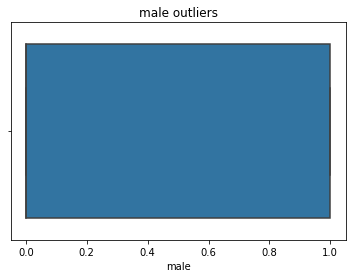

The column names are ::::::::::::::::::::: age


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


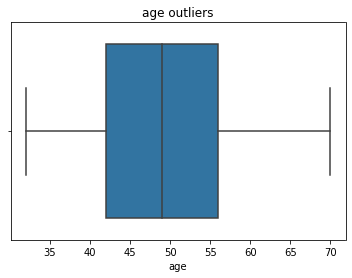

The column names are ::::::::::::::::::::: education


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


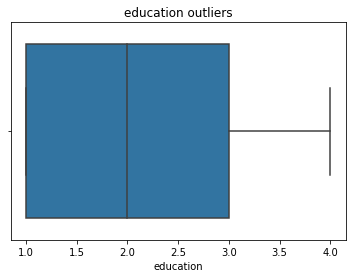

The column names are ::::::::::::::::::::: currentSmoker


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


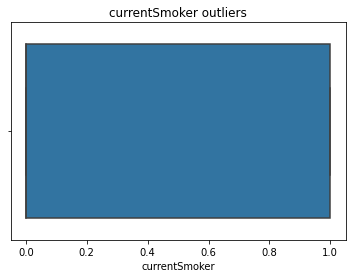

The column names are ::::::::::::::::::::: cigsPerDay


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


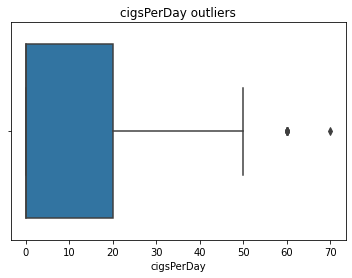

The column names are ::::::::::::::::::::: BPMeds


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


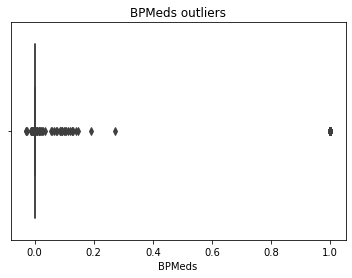

The column names are ::::::::::::::::::::: prevalentStroke


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


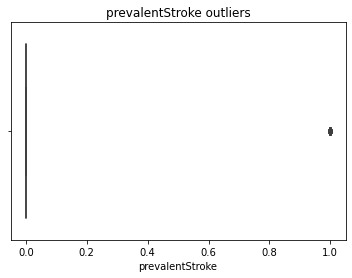

The column names are ::::::::::::::::::::: prevalentHyp


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


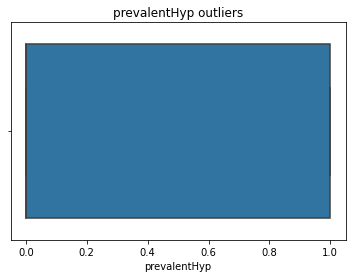

The column names are ::::::::::::::::::::: diabetes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


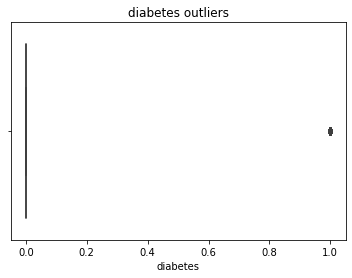

The column names are ::::::::::::::::::::: totChol


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


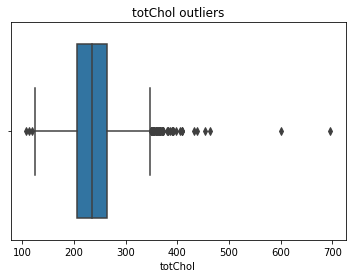

The column names are ::::::::::::::::::::: sysBP


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


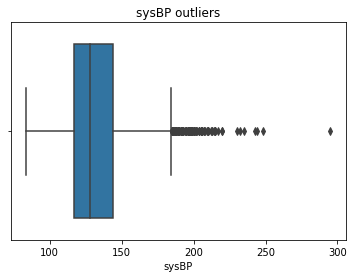

The column names are ::::::::::::::::::::: diaBP


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


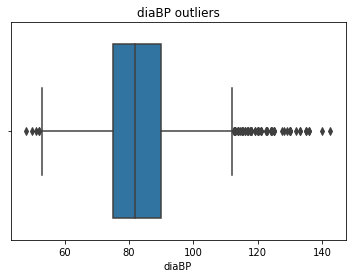

The column names are ::::::::::::::::::::: BMI


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


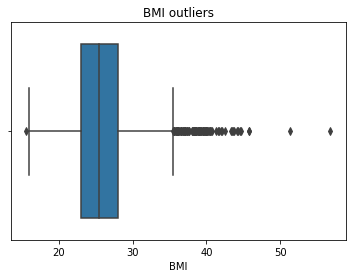

The column names are ::::::::::::::::::::: heartRate


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


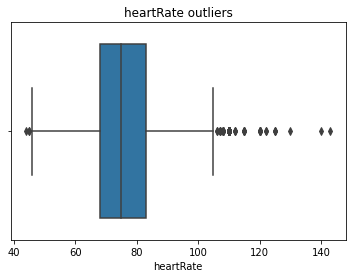

The column names are ::::::::::::::::::::: glucose


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


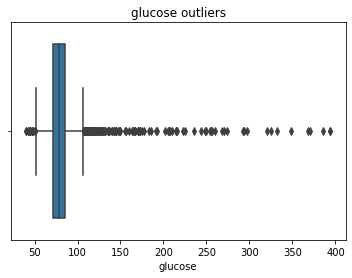

The column names are ::::::::::::::::::::: TenYearCHD


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


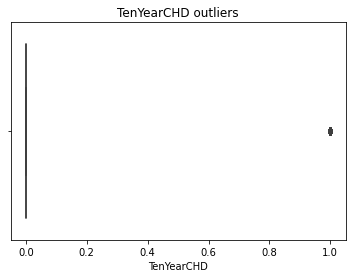

In [26]:
for col_name in column_names:
     print("The column names are :::::::::::::::::::::",col_name)
     title = col_name+" outliers"
     visualizeOutlier(pd_file[col_name], title)

In [27]:
Outler1=zScoreOutlier(pd_file)


ERRORED DESC	::name 'stats' is not defined:
ERRORED MODULE	::<class 'NameError'>:
ERRORED LINE	::17:


In [28]:
numericCols = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categoricalCols = ['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
pd_file.dtypes

male               float64
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

PCA - DBSCAN Age, HeartRate


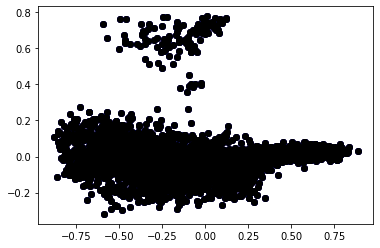

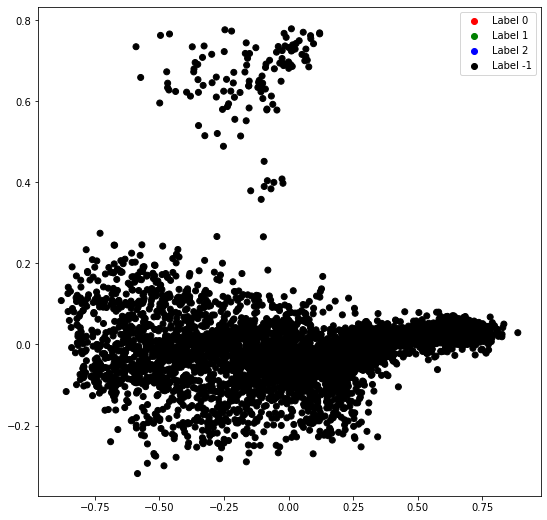

In [29]:
print('PCA - DBSCAN Age, HeartRate')
findPCA(pd_file)

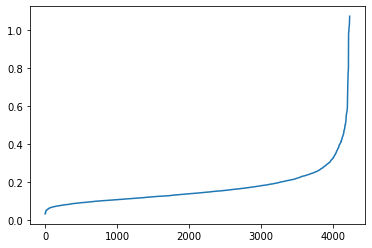

In [30]:
DBScanOutlier(pd_file)

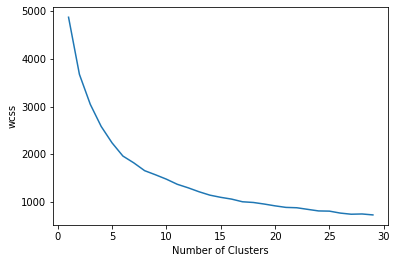

ERRORED DESC	::'medIncome':
ERRORED MODULE	::<class 'KeyError'>:
ERRORED LINE	::19:


In [31]:
KmeansOutlier(Scaled_Data)

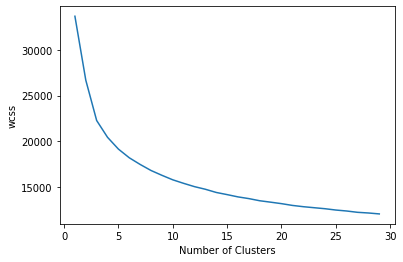

ERRORED DESC	::'medIncome':
ERRORED MODULE	::<class 'KeyError'>:
ERRORED LINE	::19:


In [32]:
KmeansOutlier(Scaled_Data1)

In [33]:
vifOutlier(Scaled_Data)

const              36.927498
male                1.203577
age                 1.405701
education           1.058185
currentSmoker       2.552941
cigsPerDay          2.693066
BPMeds              1.106938
prevalentStroke     1.021976
prevalentHyp        2.056479
diabetes            1.646208
totChol             1.110862
sysBP               3.770518
diaBP               2.969723
BMI                 1.239819
heartRate           1.096908
glucose             1.681589
TenYearCHD          1.108373
dtype: float64


ERRORED DESC	::name 'x1' is not defined:
ERRORED MODULE	::<class 'NameError'>:
ERRORED LINE	::11:


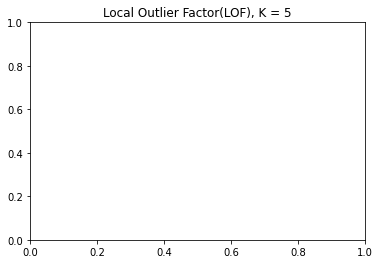

In [34]:
lofOutlier(Scaled_Data, 5)

In [35]:
print('BIN')
createBin(pd_file,numericCols, 4)

BIN


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,totCholBin
0,1.0,39.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0,"(106.9, 303.3]"
1,0.0,46.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0,"(106.9, 303.3]"
2,1.0,48.0,1.0,1.0,20.0,0.000000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0,"(106.9, 303.3]"
3,0.0,61.0,3.0,1.0,30.0,0.000000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0,"(106.9, 303.3]"
4,0.0,46.0,3.0,1.0,23.0,0.000000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0,"(106.9, 303.3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0,"(303.3, 499.7]"
4234,1.0,51.0,3.0,1.0,43.0,0.000000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0,"(106.9, 303.3]"
4235,0.0,48.0,2.0,1.0,20.0,0.013449,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0,"(106.9, 303.3]"
4236,0.0,44.0,1.0,1.0,15.0,0.000000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,77.526904,0.0,"(106.9, 303.3]"


In [36]:
gg_plot(pd_file, numericCols, categoricalCols)

ERRORED DESC	::Unknown argument type <class 'plotnine.positions.position_dodge.position_dodge'>, expected mapping/aes.:
ERRORED MODULE	::<class 'TypeError'>:
ERRORED LINE	::8:


In [37]:

sns_plot(pd_file, numericCols, categoricalCols)

ERRORED DESC	::Could not interpret input 'education':
ERRORED MODULE	::<class 'ValueError'>:
ERRORED LINE	::10:


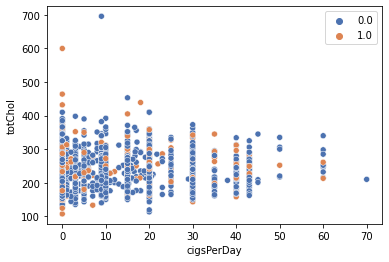

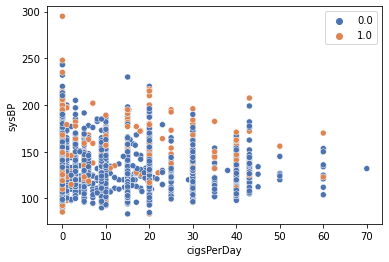

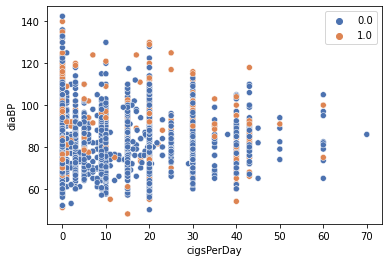

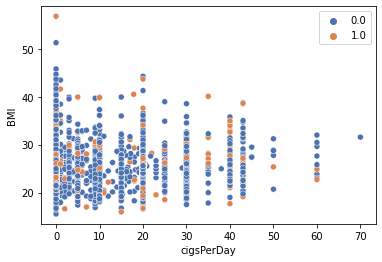

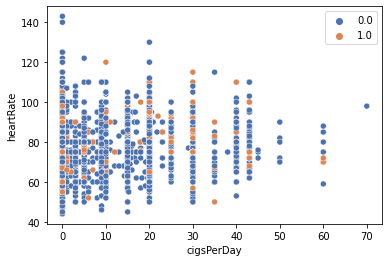

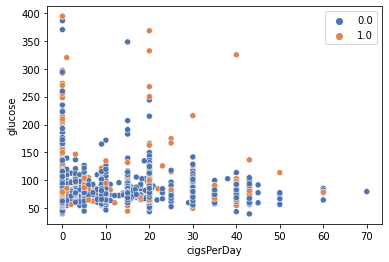

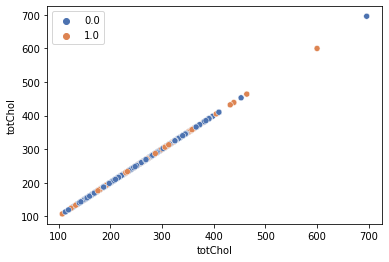

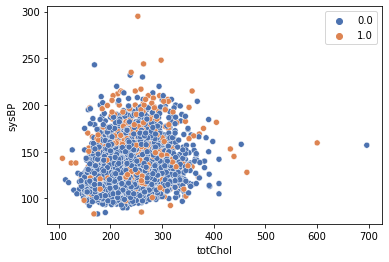

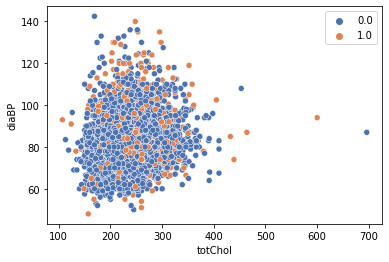

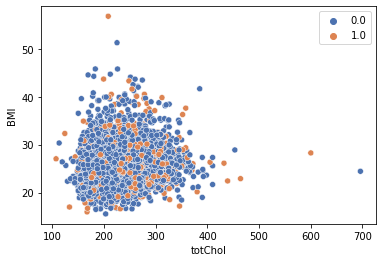

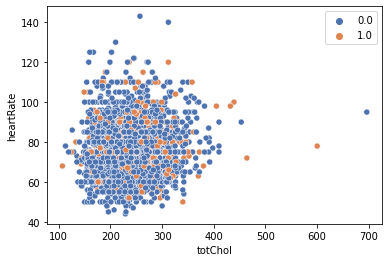

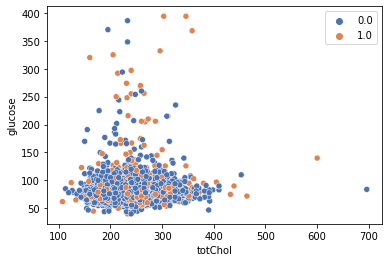

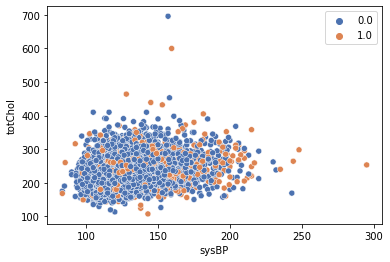

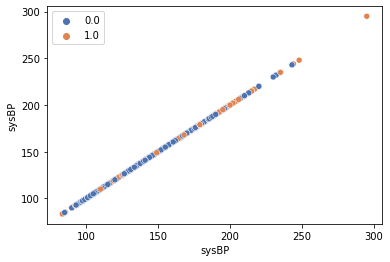

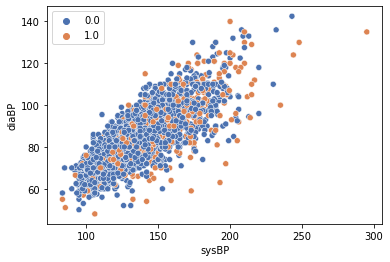

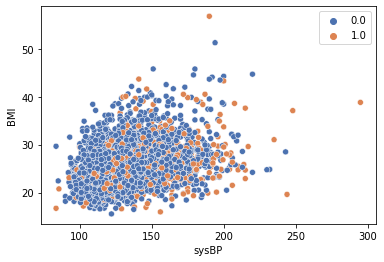

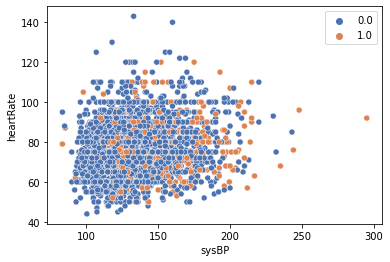

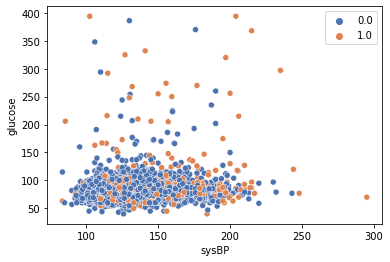

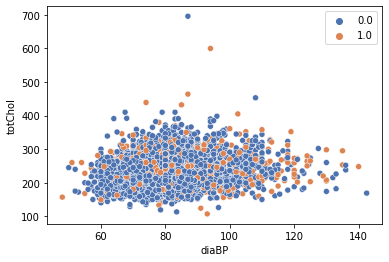

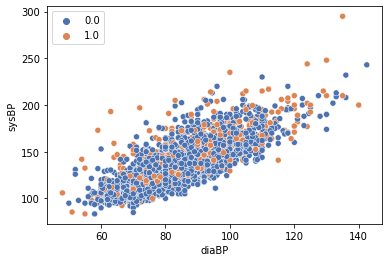

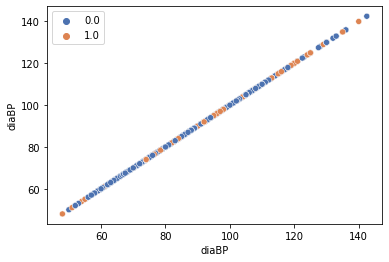

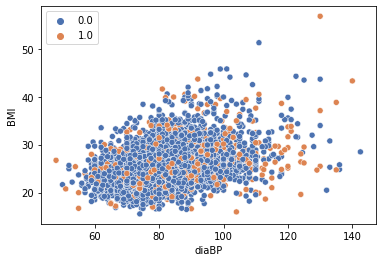

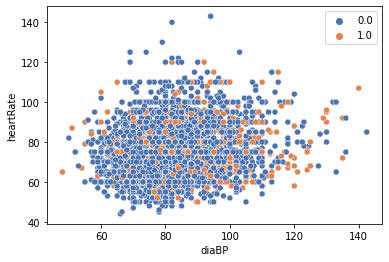

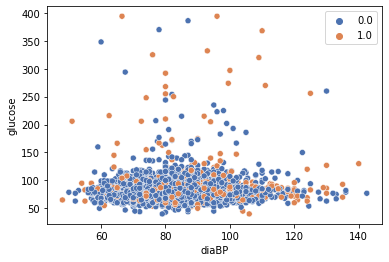

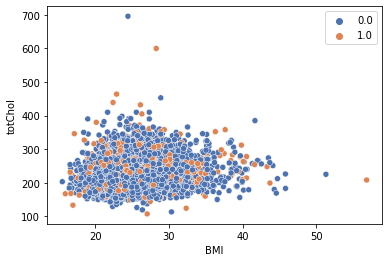

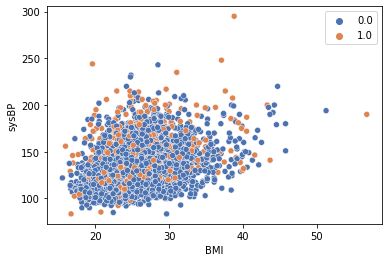

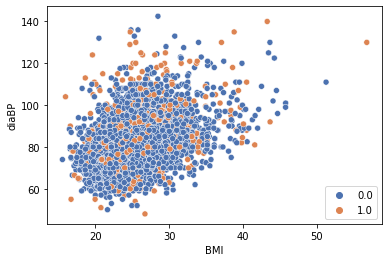

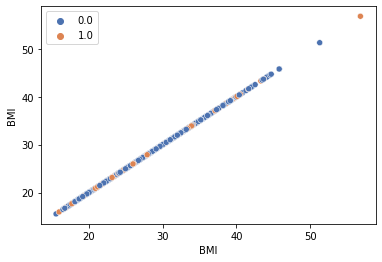

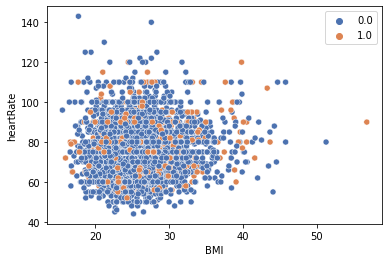

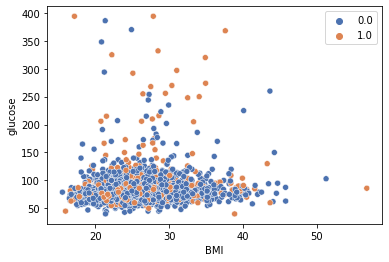

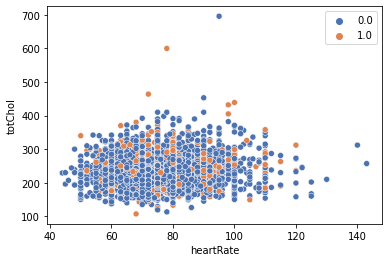

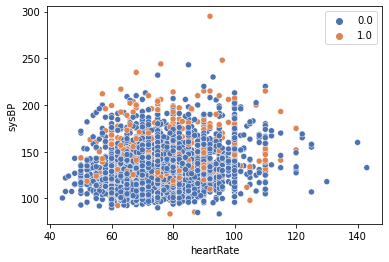

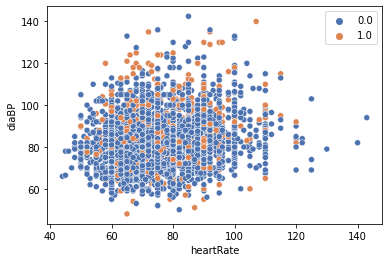

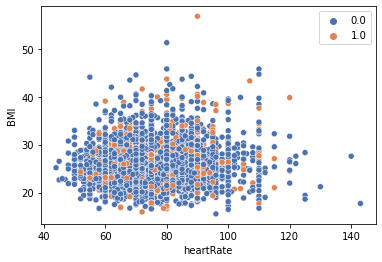

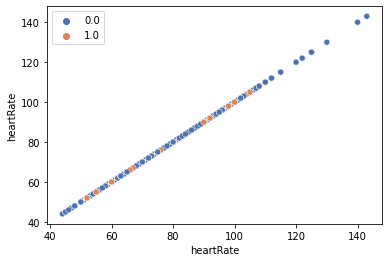

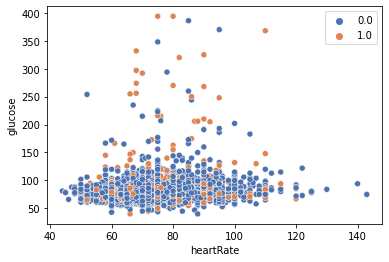

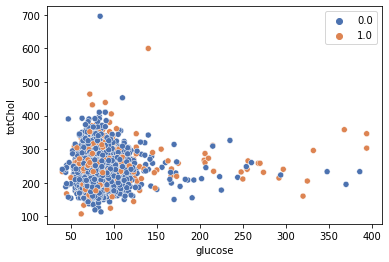

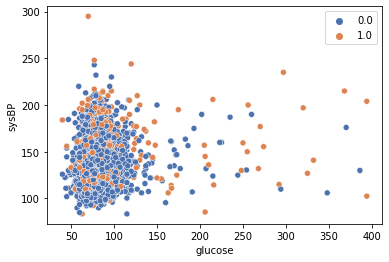

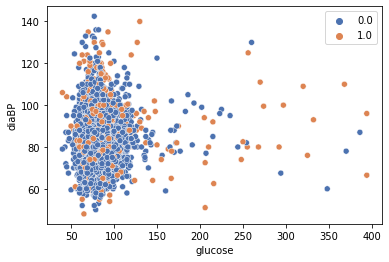

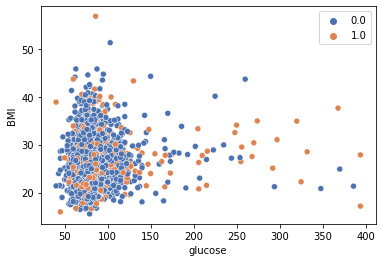

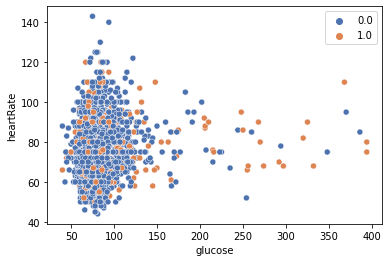

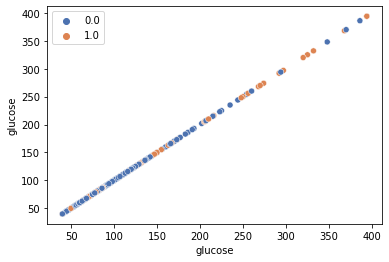

In [38]:
scatter_plot(pd_file,numericCols)